In [1]:
from image_processing import *

Original Image


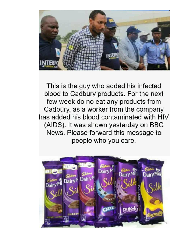

In [2]:
img = ingest_image_disk("./fake.jpg")

print("Original Image")
plot_cv_image(img)

[[12, 804, 680, 400], [0, 0, 723, 334]]
Image 0


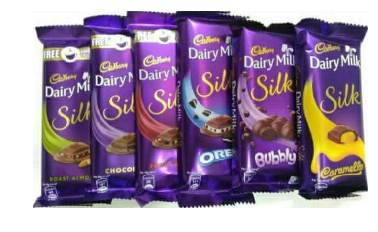

Image 1


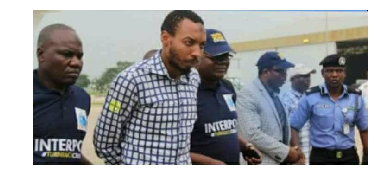

In [3]:
crop_list = suggest_smart_crop(img, 2)
print(crop_list)
cropped_images = []

for i, crop in enumerate(crop_list):
    print("Image", i)
    cropped_image = crop_image(img, crop)
    cropped_images.append(cropped_image)
    plot_cv_image(cropped_image)

In [ ]:
file_name = "./Di7HEJ5W0AAck9E.jpg"

In [ ]:
results = detect_web(file_name, 1000, True)
annotations = results

In [ ]:
import urllib
import email.utils as eut
import time

output = {}

In [ ]:
output["full_matches"] = []
output["partial_matches"] = []
output["similar_images"] = []
for page in annotations.pages_with_matching_images:
    for image in page.full_matching_images:
        try:
            img_url = str(image.url).split("?")[0]
            print(img_url, end="\n: ")
            output["full_matches"].append({"image_url": img_url, "unix_time": None})
            conn = urllib.request.urlopen(img_url, timeout=3)
            date_time = conn.headers['last-modified']
            date_time = eut.parsedate(date_time)
            unixtime = time.mktime(date_time)
            print(unixtime)
            output["full_matches"].append({"image_url": img_url, "unix_time": unixtime})
        except Exception as e:
            print(e, date_time)
        print(" ")
        
    for image in page.partial_matching_images:
        try:
            img_url = str(image.url).split("?")[0]
            print(img_url, end="\n: ")
            output["partial_matches"].append({"image_url": img_url, "unix_time": None})
            conn = urllib.request.urlopen(img_url, timeout=3)
            date_time = conn.headers['last-modified']
            date_time = eut.parsedate(date_time)
            unixtime = time.mktime(date_time)
            print(unixtime)
            output["partial_matches"].append({"image_url": img_url, "unix_time": unixtime})
        except Exception as e:
            print(e, date_time)
        print(" ")
        
for image in annotations.visually_similar_images:
    try:
        img_url = str(image.url).split("?")[0]
        print(img_url, end="\n: ")
        output["similar_images"].append({"image_url": img_url, "unix_time": None})
        conn = urllib.request.urlopen(img_url, timeout=3)
        date_time = conn.headers['last-modified']
        date_time = eut.parsedate(date_time)
        unixtime = time.mktime(date_time)
        print(unixtime)
        output["similar_images"].append({"image_url": img_url, "unix_time": unixtime})
    except Exception as e:
        print(e, date_time)
        print(" ")

In [ ]:
output

In [ ]:
import json

def is_json(myjson):
    try:
        json_object = json.loads(myjson)
    except Exception as e:
        print(e)
        return False
    return True

json_payload = json.dumps(output)

is_json(json_payload)

In [ ]:
json_payload

In [ ]:
if annotations.best_guess_labels:
        for label in annotations.best_guess_labels:
            print('\nBest guess label: {}'.format(label.label))

if annotations.pages_with_matching_images:
    print('\n{} Pages with matching images found:'.format(
        len(annotations.pages_with_matching_images)))

    for page in annotations.pages_with_matching_images:
        print('\n\tPage url   : {}'.format(page.url))

        if page.full_matching_images:
            print('\t{} Full Matches found: '.format(
                   len(page.full_matching_images)))

            for image in page.full_matching_images:
                print('\t\tImage url  : {}'.format(image.url))

        if page.partial_matching_images:
            print('\t{} Partial Matches found: '.format(
                   len(page.partial_matching_images)))

            for image in page.partial_matching_images:
                print('\t\tImage url  : {}'.format(image.url))

if annotations.web_entities:
    print('\n{} Web entities found: '.format(
        len(annotations.web_entities)))

    for entity in annotations.web_entities:
        print('\n\tScore      : {}'.format(entity.score))
        print(u'\tDescription: {}'.format(entity.description))

if annotations.visually_similar_images:
    print('\n{} visually similar images found:\n'.format(
        len(annotations.visually_similar_images)))

    for image in annotations.visually_similar_images:
        print('\tImage url    : {}'.format(image.url))